<a href="https://colab.research.google.com/github/Benendead/MNIST_Notebook/blob/master/Abridged_Keras_and_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abridged: Classifying the MNIST dataset using Keras and CNNs
*Compiled by Benned Hedegaard*

In this notebook, we'll build a convolutional neural network using Keras, train our model to recognize handwritten digits, and then submit the results to a Kaggle competition using the MNIST dataset.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WKCNAtIpJ_0Cmyhn-jAFS9KSCcDUX5H1#scrollTo=kLLfMFZE8aP8&uniqifier=1)

## Import everything we'll need

In [1]:
# Imports everything we'll need. 
# Typically, Colab already has these imported but I've kept these here so that it's clear what we're using.

import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Can create a linear stack of layers.
from keras.models import Sequential
# Basically the core layers of any neural network.
from keras.layers import Dense, Dropout, Activation, Flatten
# Specifically CNN layers.
from keras.layers import Conv2D, MaxPooling2D
# Useful utilities
from keras.utils import np_utils

!pip install -q xlrd
!git clone https://github.com/Benendead/MNIST_Notebook/
  
# Open up the .zip file containing our dataset.
!unzip MNIST_Notebook/dataset.zip

# This reads in the .csv files we've imported and uncompressed from Github.
# The test variable here is a pandas DataFrame.
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

Using TensorFlow backend.


Cloning into 'MNIST_Notebook'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (47/47), done.
Archive:  MNIST_Notebook/dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
   creating: __MACOSX/
   creating: __MACOSX/dataset/
  inflating: __MACOSX/dataset/._test.csv  
  inflating: dataset/train.csv       
  inflating: __MACOSX/dataset/._train.csv  


## Data Preprocessing

0 1
2 7


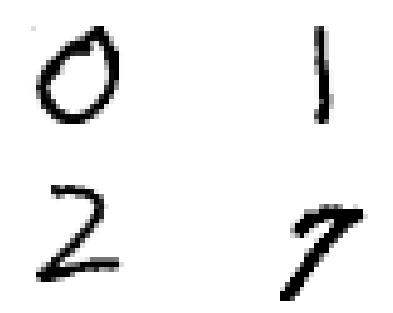

In [2]:
# We now put the datasets into numpy arrays.
np_train = train.values
np_test = test.values

# These format the arrays so that the images are now grids instead of rows.
# We also extract the labels for the training data as Y_train.
X_train = np_train[:,1:]
X_train = np.reshape(X_train, (len(X_train), 28, 28))
Y_train = np_train[:,0]

X_test = np.reshape(np_test, (len(np_test), 28, 28, 1)) # Change the dimensions because that's what our Keras model wants.


# Randomly plots four examples from the training data.
# Also prints their labels from the training data labels.
fig, axes = plt.subplots(nrows = 2, ncols = 2)
nums = []
for i in range(4):
    num = np.random.randint(0, len(X_train))
    nums.append(num)

# Removes ticks from all 4 subplots in one line.
plt.setp(axes, xticks = [], yticks = [])
    
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].imshow(X_train[nums[k]])
        k += 1

print(Y_train[nums[0]], Y_train[nums[1]])
print(Y_train[nums[2]], Y_train[nums[3]])

In [3]:
# This shows what the data actually looks like to the machine.
index = 1
print(Y_train[index])
pd.DataFrame(X_train[index])

0


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,13,86,...,32,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,16,179,254,...,231,54,15,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,72,254,254,...,254,254,104,0,0,0,0,0,0,0
8,0,0,0,0,0,0,61,191,254,254,...,254,254,243,85,0,0,0,0,0,0
9,0,0,0,0,0,0,172,254,254,254,...,254,254,254,171,0,0,0,0,0,0


In [0]:
# We need to format the data into the description:
#              n, depth, width, height.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(Y_train, 10)

## Creating the Convolutional Neural Network

In [0]:
# Moving right along, let's establish our model.
model = Sequential()

# We also add the first layer, the input layer.
model.add(Conv2D(32, (3, 3), strides = (1, 1), 
                 activation = "relu", input_shape = (28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation = 'relu')) # The first hidden layer.
model.add(MaxPooling2D(pool_size = (2, 2))) # The first pooling layer. 
model.add(Dropout(0.25)) # First dropout layer.
model.add(Conv2D(16, (2, 2), activation = "relu")) # The second hidden layer.
model.add(Dropout(0.15)) # Second dropout layer.
model.add(Flatten())

# We add a fully connected layer, dropout one last time, and then have our final layer.
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "sigmoid"))
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

 **Format of the Conv2D arguments**

filters : integer

kernal_size : tuple

strides : tuple (optional, default is (1,1))

activation : String

*Options include softmax, elu, relu, softplus, softsign, tanh, sigmoid, and more.*
    
input_shape : tuple (Conv2D expects a 3-tuple)

## Training and testing

In [6]:
# Trains the model for a given number of epochs. Takes about a minute and a half if we're on Colab's GPU. Any questions?
model.fit(X_train, Y_train, 
          batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
42000/42000 [==============================] - 17s 412us/step - loss: 0.3470 - acc: 0.8976
Epoch 2/5
42000/42000 [==============================] - 14s 325us/step - loss: 0.1129 - acc: 0.9671
Epoch 3/5
42000/42000 [==============================] - 14s 323us/step - loss: 0.0877 - acc: 0.9743
Epoch 4/5
42000/42000 [==============================] - 14s 324us/step - loss: 0.0726 - acc: 0.9777
Epoch 5/5
42000/42000 [==============================] - 14s 326us/step - loss: 0.0626 - acc: 0.9816


 **Format of the model.fit arguments**

batch_size determines how many samples to use for each gradient update.

epochs is the number of epochs to train the model. Each epoch is an iteration over the entire X, Y sets.

verbose has three possible settings:
* *0 would be silent.*
* *1 would be a progress bar.*
* *2 would be a message for each epoch.*

In [8]:
# This evaluates the model on the training data. 
# We have no test data from Kaggle, so this is the next best thing.
score = model.evaluate(X_train, Y_train, verbose = 1)

# These are the loss and accuracy values. Ask someone who knows what they're doing what that means.
score

# Creates a numpy array of our algorithm's predictions on the test dataset.
predictions = model.predict_classes(X_test, verbose = 1)

# And then this exports our predictions to a csv file.
# Note that the submission suggestion was 1-indexed. Ugh.
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("predictions.csv", index = False)

# We could then submit that .csv to the Kaggle competition.

28000/28000 [==============================] - 2s 78us/step


Up to this point in the notebook, this article was the main source I used:

https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-1

## Saving/loading a Keras model

Beyond all of that testing and training, we want the ability to save what our model has learned so far.

I had a source for the initial method I used to do this, but I ended up just reading Keras' documentation and found a better way to save models.

In [0]:
import h5py # Just in case.

def saveModel(model, fileName):
    """
    Saves a given Keras model into a .h5 file.
    
    Parameters
    ----------
    model : Keras model
        The model to be saved.
    fileName : String
        The main name of the files.
    """
    # Save model to HDF5
    h5_string = fileName + ".h5"
    model.save(h5_string)
    print("Saved model to disk")
    
def loadModel(filePath):
    """
    Loads a given Keras model from a filepath.
    
    Parameters
    ----------
    filePath : String
        The path to the file.
    """
    loaded_model = keras.models.load_model(filePath)
    print("Loaded model from disk")
    return loaded_model

In [10]:
new_model = loadModel("MNIST_Notebook/fifty_epochs.h5")
new_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
new_model.fit(X_train, Y_train, 
              batch_size = 32, epochs = 1, verbose = 1)
score = new_model.evaluate(X_train, Y_train, verbose = 1)
score

Loaded model from disk
Epoch 1/1
42000/42000 [==============================] - 4s 96us/step


[0.0013790643666274523, 0.9997142857142857]

As a note:

* The test accuracy was 0.9994761904761905 after 30 epochs.
* It was 0.9996428571428572 after 50 epochs, with a lot of fluctuation.

In [11]:
saveModel(new_model, "fiftyone_epochs")

from google.colab import files
files.download("fiftyone_epochs.h5")

# This creates the .csv of our new preditions.

predictions = new_model.predict_classes(X_test, verbose = 1)
df = pd.DataFrame({"ImageId" : range(1,len(predictions) + 1),
                   "Label" : predictions})
df.to_csv("51_epochs.csv", index = False)

files.download("51_epochs.csv")

Saved model to disk
28000/28000 [==============================] - 2s 85us/step


As one last thing, the command to submit a csv file to Kaggle is:

kaggle competitions submit -c digit-recognizer -f filepath/etc/submission.csv -m "This is my message."